<a href="https://colab.research.google.com/github/Suresh1514/Suresh1514/blob/main/Project_Work_ExcelR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud, STOPWORDS


In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 41.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 2.6 MB/s eta 0:00:00


In [ ]:
import streamlit

In [ ]:
data = pd.read_excel('/content/drugsCom_raw.xlsx')
data.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil""",9,2012-05-20,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \nWe have tried many different medications and so far this is the most effective.""",8,2010-04-27,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas.""",5,2009-12-14,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch""",8,2015-11-03,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around. I feel healthier, I&#039;m excelling at my job and I always have money in my pocket and my savings account. I had none of those before Suboxone and spent years abusing oxycontin. My paycheck was already spent by the time I got it and I started resorting to scheming and stealing to fund my addiction. All that is history. If you&#039;re ready to stop, there&#039;s a good chance that suboxone will put you on the path of great life again. I have found the side-effects to be minimal compared to oxycontin. I&#039;m actually sleeping better. Slight constipation is about it for me. It truly is amazing. The cost pales in comparison to what I spent on oxycontin.""",9,2016-11-27,37


In [ ]:
data.shape

(161297, 7)

In [ ]:
# Summary stats
print("Summary Statistics:\n", data.describe(include='all'))
print("\nInfo:")
data.info()
print("\nMissing Values:\n", data.isnull().sum())


Summary Statistics:
            Unnamed: 0        drugName      condition  review         rating  \
count   161297.000000          161297         160398  161297  161297.000000   
unique            NaN            3436            884  112329            NaN   
top               NaN  Levonorgestrel  Birth Control  "Good"            NaN   
freq              NaN            3657          28788      33            NaN   
mean    115923.585305             NaN            NaN     NaN       6.994377   
min          2.000000             NaN            NaN     NaN       1.000000   
25%      58063.000000             NaN            NaN     NaN       5.000000   
50%     115744.000000             NaN            NaN     NaN       8.000000   
75%     173776.000000             NaN            NaN     NaN      10.000000   
max     232291.000000             NaN            NaN     NaN      10.000000   
std      67004.445170             NaN            NaN     NaN       3.272329   

                              

In [ ]:
# Drop missing values
data.dropna(subset=['review', 'rating', 'drugName'], inplace=True)
data.isnull().sum()

,0
Unnamed: 0,0
drugName,0
condition,899
review,0
rating,0
date,0
usefulCount,0


In [ ]:
# Focused conditions
target_conditions = ['Depression', 'High Blood Pressure', 'Diabetes, Type 2']
data = data[data['condition'].isin(target_conditions)]

In [ ]:
data.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
11,75612,L-methylfolate,Depression,"""I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\n\nI only take Cymbalta now mostly for pain.\n\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects.""",10,2017-03-09,54
31,96233,Sertraline,Depression,"""1 week on Zoloft for anxiety and mood swings. I take 50mg in the mornings with my breakfast. Nausea on day one but that subsided as the week went on. I get the jitters about 2 hrs after taking it followed by yawning. I feel much better though and less angry/stressed.""",8,2011-05-07,3
44,121333,Venlafaxine,Depression,"""my gp started me on Venlafaxine yesterday to help with depression and the change,a hour after taking them i was feeling very sick couldn,t stomach food or fluids, thought keep it up as she told me they did come with some side effects which would get better,took another one last night and was so ill i couldn,t stand ,being sick sweating shaking thought i was going to pass out. Did get some sleep hopeing to feel better this morning,took another one and felt so spaced out dry mouth shaking ,sick, so booked in to see gp again to make sure i should be feeling like this, only to find out she had put me on the wrong dose should have been on 37.5mg was put on 150mg, now on right dose hope this will be better""",4,2016-04-27,3
50,156544,Dulaglutide,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my last post as I wanted to give it a few months to see how this was going to work. So, I have been on Trulicity for six months now with Metformin. When I hit the five month period the diarrhea, gas, sulphur belching finally subsided. I now longer have any of those side effects. However, I still haven&#039;t lost any weight at all, but I think that was because when I first started Trulicity I was taking it with Glimepiride and that one has a side effect of weight gain so I think the two meds were fighting each other lol. I have been back on the Metformin with Trulicity for about a week now, so we will see what this does. I was diagnosed as stage 3 chronic kidney disease (CKD 3) so I am watching diet closely.""",10,2017-10-24,24
67,131909,Effexor XR,Depression,"""This medicine saved my life. I was at my wits end with anti-depressants and was ready to give up. My doctor finally prescribed me this after many failed medications, I am so glad she did. I honestly do not know where I would be without Effexor XR. Side effects were very mild compared to other anti-depressants I tried. I was drowsy for the first couple days, but it was tolerable. I highly recommend this for severe depression. I would also like to mention for people to realize there is light at the end of the tunnel and YOU WILL GET BETTER, and to never give up.""",10,2013-06-20,166


In [ ]:
data.shape

(13944, 7)

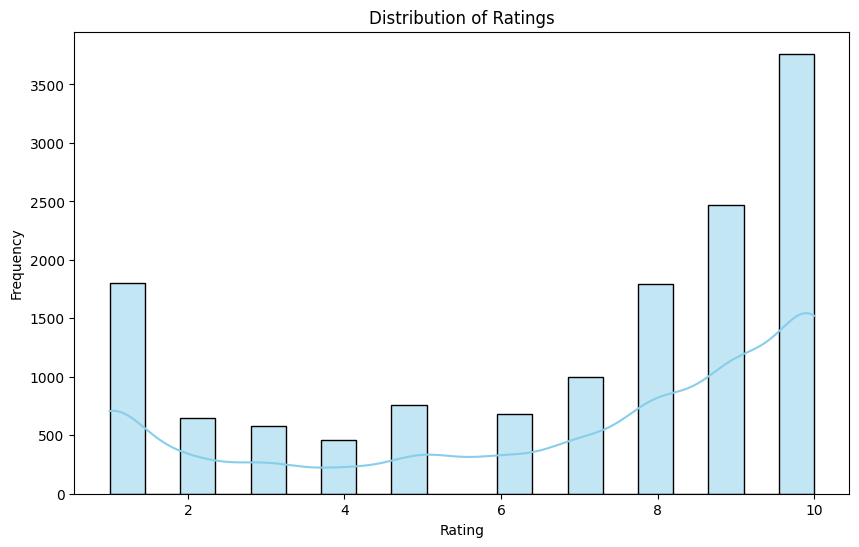

In [ ]:
# Bar Graph- Rating distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

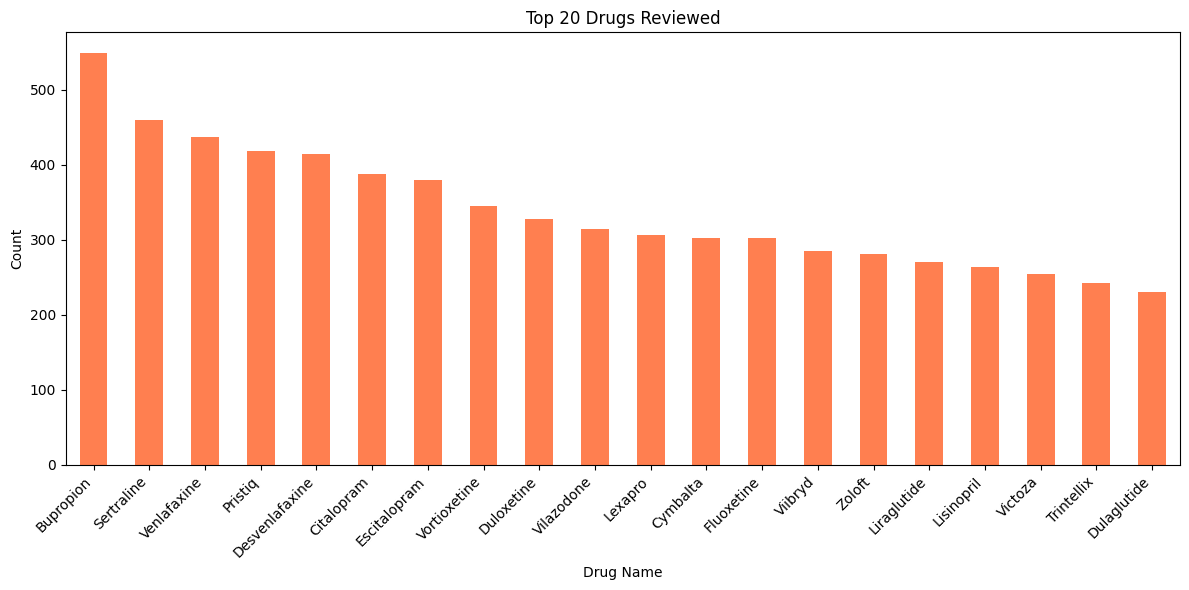

In [ ]:
# Top reviewed drugs
plt.figure(figsize=(12, 6))
data['drugName'].value_counts().nlargest(20).plot(kind='bar', color='coral')
plt.title('Top 20 Drugs Reviewed')
plt.xlabel('Drug Name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

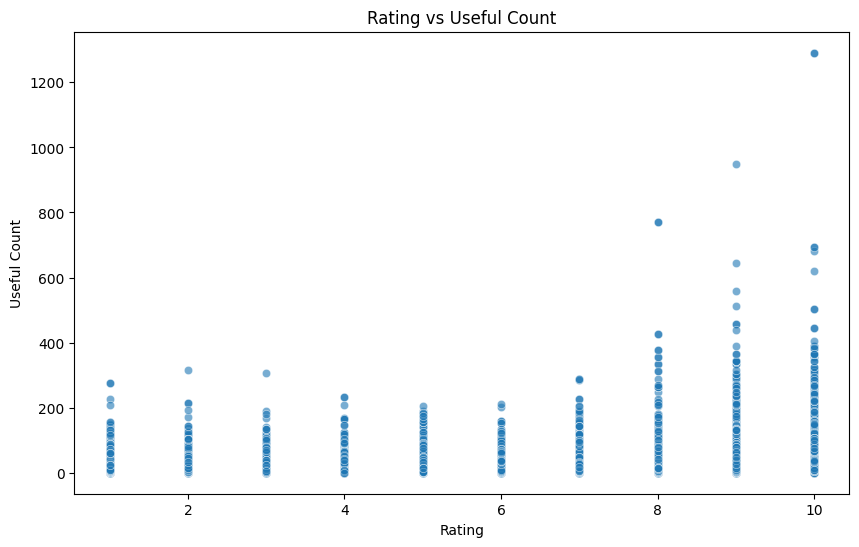

In [ ]:
# Ratings vs UsefulCount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rating', y='usefulCount', data=data, alpha=0.6)
plt.title('Rating vs Useful Count')
plt.xlabel('Rating')
plt.ylabel('Useful Count')
plt.show()

/tmp/ipython-input-44-2898965241.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='condition', y='rating', data=data, palette='Set2')


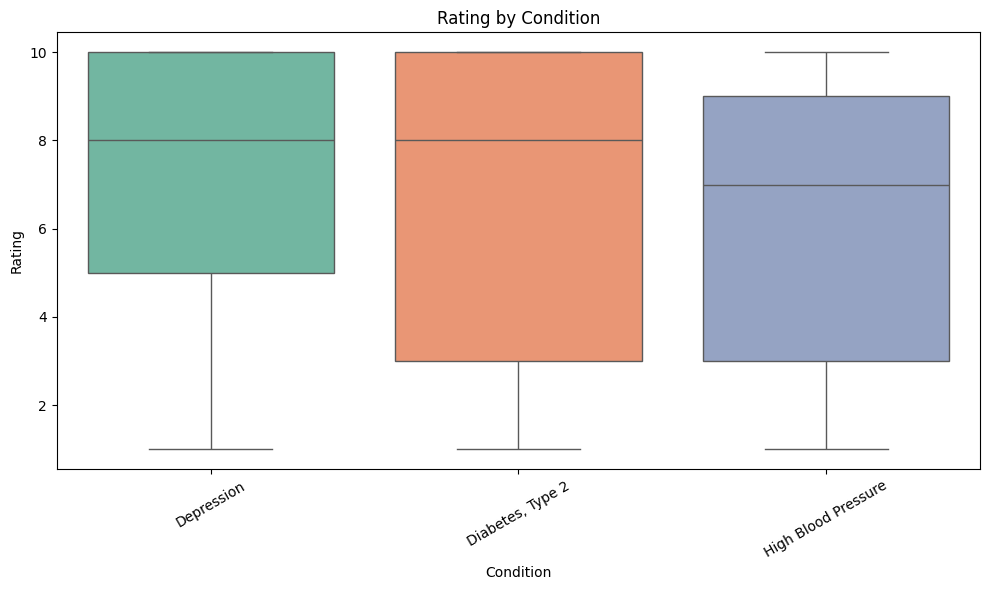

In [ ]:
# Box Plot - Rating by condition
plt.figure(figsize=(10, 6))
sns.boxplot(x='condition', y='rating', data=data, palette='Set2')
plt.title('Rating by Condition')
plt.xlabel('Condition')
plt.ylabel('Rating')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

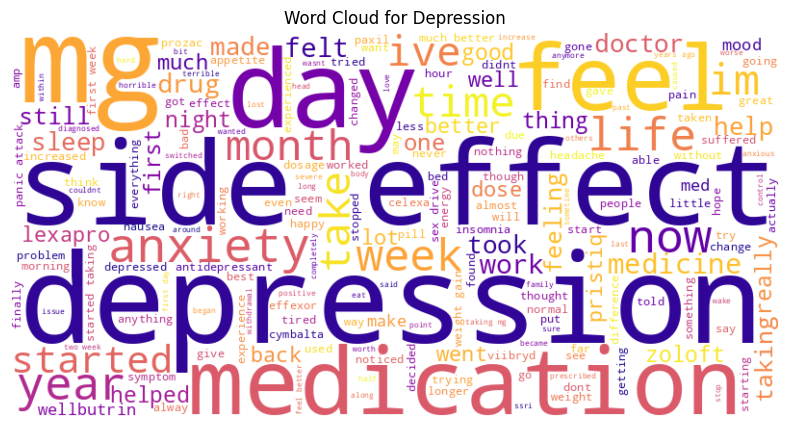

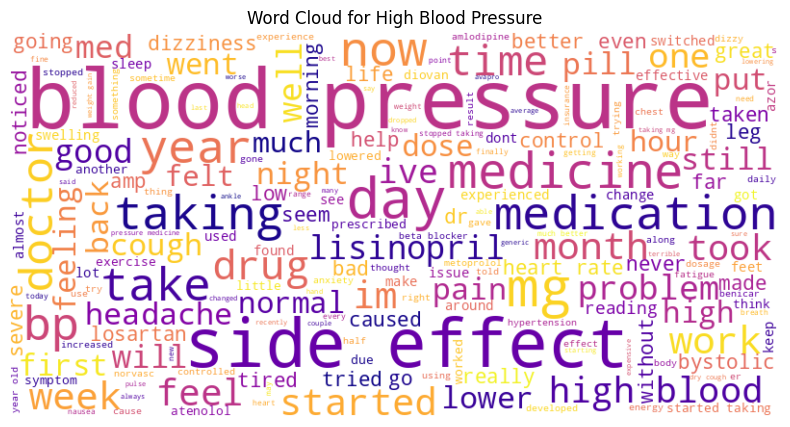

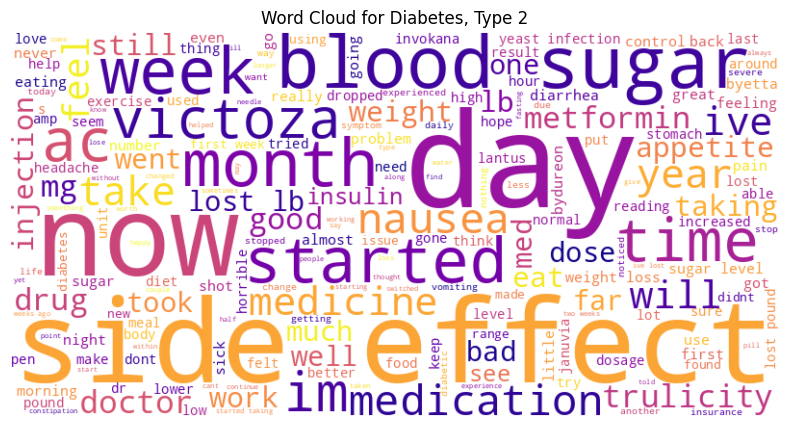

In [ ]:
# Clean review text for NLP
def clean_text(text):
    text = text.lower()
    text = re.sub(r"<.*?>", "", text)
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    return text

data['clean_review'] = data['review'].apply(clean_text)

# WordCloud
for condition in target_conditions:
    text = ' '.join(data[data['condition'] == condition]['clean_review'])
    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          stopwords=STOPWORDS, colormap='plasma').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {condition}')
    plt.axis('off')
    plt.show()

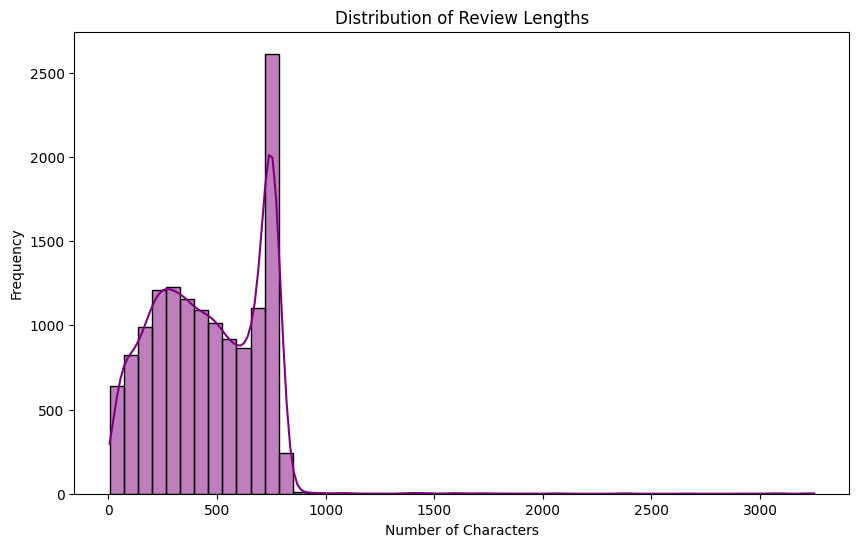

In [ ]:
# Review length analysis
data['review_length'] = data['review'].str.len()
plt.figure(figsize=(10, 6))
sns.histplot(data['review_length'], bins=50, kde=True, color='purple')
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.show()

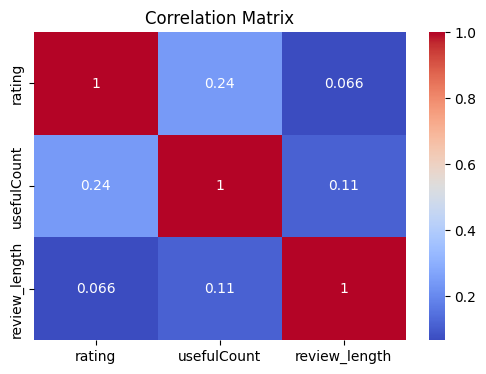

In [ ]:
# Correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(data[['rating', 'usefulCount', 'review_length']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


 Top 20 Most Reviewed Drugs:
drugName
Bupropion         549
Sertraline        459
Venlafaxine       437
Pristiq           418
Desvenlafaxine    414
Citalopram        388
Escitalopram      380
Vortioxetine      345
Duloxetine        328
Vilazodone        315
Lexapro           306
Cymbalta          303
Fluoxetine        302
Viibryd           285
Zoloft            281
Liraglutide       270
Lisinopril        264
Victoza           255
Trintellix        243
Dulaglutide       231
Name: count, dtype: int64

Total unique drugs: 334

 Distribution of Conditions:
condition
Depression             9069
Diabetes, Type 2       2554
High Blood Pressure    2321
Name: count, dtype: int64


/tmp/ipython-input-48-3828620374.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='condition', palette='Set2')


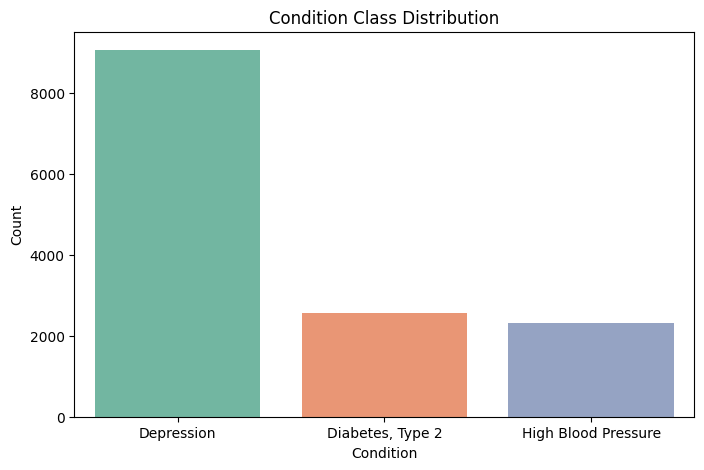

In [ ]:
# 1. Frequency of each drugName
print("\n Top 20 Most Reviewed Drugs:")
print(data['drugName'].value_counts().head(20))

# Count how many unique drugs exist
print(f"\nTotal unique drugs: {data['drugName'].nunique()}")

# 2. Class distribution of target variable (condition)
print("\n Distribution of Conditions:")
print(data['condition'].value_counts())

#  Plot class imbalance
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='condition', palette='Set2')
plt.title('Condition Class Distribution')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.show()


In [ ]:
# Select only numerical columns for IQR calculation
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Calculate IQR
Q1 = data[numerical_cols].quantile(0.25)
Q3 = data[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Show count of outliers in each numerical column
outliers = ((data[numerical_cols] < (Q1 - 1.5 * IQR)) |
            (data[numerical_cols] > (Q3 + 1.5 * IQR))).sum()
print("\nOutlier Count in Each Numerical Column:\n", outliers)

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outlier rows across all numerical columns
mask = ((data[numerical_cols] >= lower_bound) &
        (data[numerical_cols] <= upper_bound)).all(axis=1)

data = data[mask]

print("✅ Outliers handled. Updated dataset shape:", data.shape)



Outlier Count in Each Numerical Column:
 Unnamed: 0         0
rating             0
usefulCount      825
review_length     28
dtype: int64
✅ Outliers handled. Updated dataset shape: (13094, 9)


### Text pre-processing

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 59.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy
import re

# Load English NLP model
nlp = spacy.load("en_core_web_sm")

# Enhanced cleaning + lemmatization function
def clean_and_lemmatize(text):
    # Lowercase
    text = text.lower()
    # Remove HTML, URLs, special characters
    text = re.sub(r"<.*?>", "", text)
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)

    # Process with spaCy
    doc = nlp(text)

    # Lemmatize, remove stopwords and short tokens
    tokens = [token.lemma_ for token in doc if not token.is_stop and len(token.lemma_) > 2]

    return " ".join(tokens)

# Apply to review column
data['clean_lemma_review'] = data['review'].apply(clean_and_lemmatize)

# Preview
data[['review', 'clean_lemma_review']].head()

,review,clean_lemma_review
11,"""I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\n\nI only take Cymbalta now mostly for pain.\n\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects.""",take antidepressant year improvement moderate severe affect make cymbalta pain begin deplin notice major improvement overnight energy well disposition sinking low low major depression take month feel like normal person time good thing effect
31,"""1 week on Zoloft for anxiety and mood swings. I take 50mg in the mornings with my breakfast. Nausea on day one but that subsided as the week went on. I get the jitters about 2 hrs after taking it followed by yawning. I feel much better though and less angry/stressed.""",week zoloft anxiety mood swing morning breakfast nausea day subside week jitter hrs take follow yawn feel well angrystressed
44,"""my gp started me on Venlafaxine yesterday to help with depression and the change,a hour after taking them i was feeling very sick couldn,t stomach food or fluids, thought keep it up as she told me they did come with some side effects which would get better,took another one last night and was so ill i couldn,t stand ,being sick sweating shaking thought i was going to pass out. Did get some sleep hopeing to feel better this morning,took another one and felt so spaced out dry mouth shaking ,sick, so booked in to see gp again to make sure i should be feeling like this, only to find out she had put me on the wrong dose should have been on 37.5mg was put on 150mg, now on right dose hope this will be better""",start venlafaxine yesterday help depression changea hour take feel sick not stomach food fluid think tell come effect bettertook night ill not stand sick sweat shaking thought pass sleep hope feel well morningtook feel space dry mouth shake sick book sure feel like find wrong dose right dose hope well
50,"""Hey Guys, It&#039;s been 4 months since my last post as I wanted to give it a few months to see how this was going to work. So, I have been on Trulicity for six months now with Metformin. When I hit the five month period the diarrhea, gas, sulphur belching finally subsided. I now longer have any of those side effects. However, I still haven&#039;t lost any weight at all, but I think that was because when I first started Trulicity I was taking it with Glimepiride and that one has a side effect of weight gain so I think the two meds were fighting each other lol. I have been back on the Metformin with Trulicity for about a week now, so we will see what this does. I was diagnosed as stage 3 chronic kidney disease (CKD 3) so I am watching diet closely.""",hey guy month post want month work trulicity month metformin hit month period diarrhea gas sulphur belching finally subside long effect not lose weight think start trulicity take glimepiride effect weight gain think med fight lol metformin trulicity week diagnose stage chronic kidney disease ckd watch diet closely
81,"""Started taking it and I slept well at night and awoke early around 5 to start my day happily. But come 8 am and I am drowsy and needed to take already two hrs nap. Awake and resume\n\nMy day with not much difficulties. Than st 2 pm again I needed a nap? So how was I gonna make it to work and my appointments too ? I went cold turkey. Felt much better after that. Only to crash again. I did try other anti depressants including pristique. But I suffered with insomnia with these meds. I know I need to start again but so confused if I should resume welbutrin""",start take sleep night awake early start day happily come drowsy need hrs nap awake resume day difficulty need nap work appointment cold turkey feel well crash try anti depressant include 

In [ ]:
# Display a few original vs cleaned reviews
pd.set_option('display.max_colwidth', None)  # so reviews don’t get cut off

sample = data[['review', 'clean_lemma_review']].sample(5, random_state=42)
print(sample)

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      review  \
18451   "Had to switch to Trulicity when Ins. wouldn&#039;t cover Bydureon. T. shot is much easier to use. Lost a few lbs due to nausea. I have stomach pains, gas, constipation, headches bloating &amp

### TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Define the vectorizer
tfidf = TfidfVectorizer(max_features=2000, ngram_range=(1,2))  # you can tune features

# Fit and transform the clean lemmatized review text
X_tfidf = tfidf.fit_transform(data['clean_lemma_review'])

# Output shape
print("TF-IDF Matrix shape:", X_tfidf.shape)

# Optional: see top features
print("Top TF-IDF features:")
print(tfidf.get_feature_names_out()[:20])


TF-IDF Matrix shape: (13094, 2000)
Top TF-IDF features:
['abdominal' 'abdominal pain' 'abilify' 'ability' 'able' 'able sleep'
 'absolutely' 'abuse' 'accept' 'ache' 'achieve' 'acid' 'act' 'active'
 'activity' 'actos' 'actually' 'actually feel' 'add' 'adderall']


### Sentiment Analysis

In [ ]:
!pip install vaderSentiment

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get compound sentiment score
def get_sentiment(text):
    score = analyzer.polarity_scores(text)  # returns dict with pos, neu, neg, compound
    return score['compound']

# Apply to clean_lemma_review column
data['sentiment_score'] = data['clean_lemma_review'].apply(get_sentiment)

# Preview
data[['clean_lemma_review', 'sentiment_score']].head()


,clean_lemma_review,sentiment_score
11,take antidepressant year improvement moderate severe affect make cymbalta pain begin deplin notice major improvement overnight energy well disposition sinking low low major depression take month feel like normal person time good thing effect,0.2648
31,week zoloft anxiety mood swing morning breakfast nausea day subside week jitter hrs take follow yawn feel well angrystressed,0.1027
44,start venlafaxine yesterday help depression changea hour take feel sick not stomach food fluid think tell come effect bettertook night ill not stand sick sweat shaking thought pass sleep hope feel well morningtook feel space dry mouth shake sick book sure feel like find wrong dose right dose hope well,-0.1022
50,hey guy month post want month work trulicity month metformin hit month period diarrhea gas sulphur belching finally subside long effect not lose weight think start trulicity take glimepiride effect weight gain think med fight lol metformin trulicity week diagnose stage chronic kidney disease ckd watch diet closely,0.7317
81,start take sleep night awake early start day happily come drowsy need hrs nap awake resume day difficulty need nap work appointment cold turkey feel well crash try anti depressant include pristique suffer insomnia med know need start confused resume welbutrin,-0.8442


Since TF-IDF values are in the range [0, 1], I used MinMaxScaler to scale sentiment scores (originally in [-1, 1]) into the same range. This avoided compatibility issues

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from scipy.sparse import hstack

sentiment_scaled = MinMaxScaler().fit_transform(data[['sentiment_score']])
X_final = hstack([X_tfidf, sentiment_scaled])


In [ ]:
# Cobining the TF-IDF with sentiment score
from scipy.sparse import hstack

# Convert sentiment_score column to a 2D array
sentiment_feature = data[['sentiment_score']].values

# Concatenate horizontally (TF-IDF + sentiment score)
X_final = hstack([X_tfidf, sentiment_feature])


### Model Building

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Target
y = data['condition']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.2, stratify=y, random_state=42
)

Accuracy: 0.944635357006491

Classification Report:
                     precision    recall  f1-score   support

         Depression       0.94      0.99      0.96      1672
   Diabetes, Type 2       0.97      0.91      0.94       504
High Blood Pressure       0.93      0.82      0.87       443

           accuracy                           0.94      2619
          macro avg       0.95      0.91      0.92      2619
       weighted avg       0.94      0.94      0.94      2619



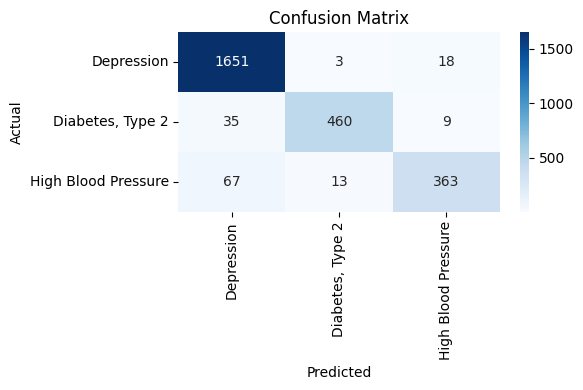

In [ ]:
# Build a baseline model (Logistic Regression)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


## Random Forest

🔸 Random Forest Accuracy: 0.9503627338678885

Classification Report (Random Forest):
                     precision    recall  f1-score   support

         Depression       0.94      0.99      0.97      1672
   Diabetes, Type 2       0.97      0.92      0.94       504
High Blood Pressure       0.97      0.82      0.89       443

           accuracy                           0.95      2619
          macro avg       0.96      0.91      0.93      2619
       weighted avg       0.95      0.95      0.95      2619



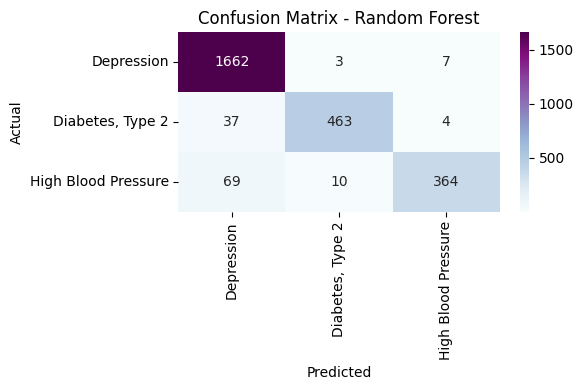

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("🔸 Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, rf_pred))

# Confusion matrix
cm_rf = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='BuPu',
            xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


##  Naive Bayes

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from scipy.sparse import hstack

# Scale sentiment from -1 to 1 → 0 to 1
scaler = MinMaxScaler()
scaled_sentiment = scaler.fit_transform(data[['sentiment_score']].values)

# Combine with TF-IDF
X_final_scaled = hstack([X_tfidf, scaled_sentiment])


🔸 Naive Bayes Accuracy: 0.9396716303932798

Classification Report (Naive Bayes):
                     precision    recall  f1-score   support

         Depression       0.93      0.99      0.96      1672
   Diabetes, Type 2       0.97      0.90      0.93       504
High Blood Pressure       0.94      0.80      0.87       443

           accuracy                           0.94      2619
          macro avg       0.95      0.90      0.92      2619
       weighted avg       0.94      0.94      0.94      2619



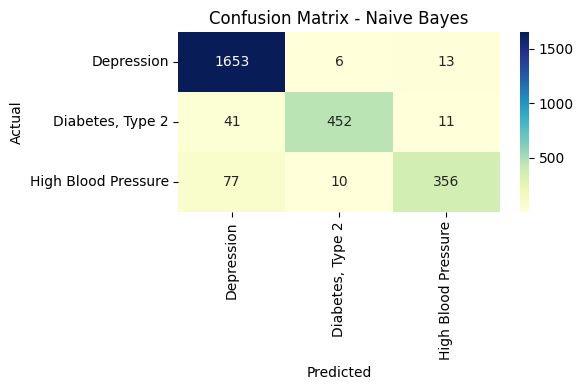

In [ ]:
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(
    X_final_scaled, y, test_size=0.2, stratify=y, random_state=42
)

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)


nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)

print("🔸 Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))
print("\nClassification Report (Naive Bayes):")
print(classification_report(y_test, nb_pred))

# Confusion matrix
cm_nb = confusion_matrix(y_test, nb_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()
